Visualización usando Lattice
===

* *30 min* | Última modificación: Junio 22, 2019

**Bibliografía**.

> [Lattice - Multivariate Data Visualization with R](http://www.springer.com/us/book/9780387759685) by Deepayan Sarkar


Algunas de las opciones discutidas anteriormente para el sistema gráfico base se mantienen y particularmente muchos de los nombres de los parámetros.

Mientras en el sistema base la graficación es realizada mediante llamadas sucesivas a varias funciones, el sistema Lattice encapsula toda la personalización en una sola llamada a la función. 

## Librerías

Para poder manipular algunas propiedades de los gráficos (como `options`) es necesario cargar la librería `Cairo`.  Se requieren cargar las siguientes librerías para poder usar `lattice`.

In [3]:
library(Cairo)  
library(lattice)
library(latticeExtra)

## Gráficos de dispersión

> [`xyplot {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/xyplot.html)

Esta es la función genérica para graficación. Para iniciar se ejemplificarán sus opciones graficando las funciones `sin`  y `cos`.

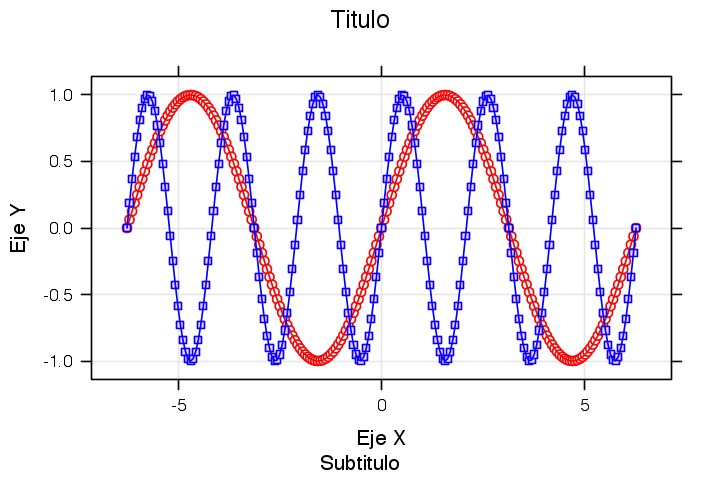

In [4]:
# se generan los puntos del eje x
x <- seq(from = -2*pi,        # para `x` desde ...
         to = 2*pi,           # para `x` hasta ...
         length.out = 201 )   # cantidad de puntos

# se generan los puntos de las dos curvas
df <- data.frame(x, 
                 y1 = sin(x), 
                 y2 = sin(3*x))

options(repr.plot.width=6, repr.plot.height=4) 

xyplot(x = y1 + y2 ~ x,        # formula
       data = df,              # dataframe
       type = c('o', 'g'),     # opciones: 'p', "l", "o", "b", "s", "h" ,  "g" - grid
       col = c('red', 'blue'), # color
       pch = c(21, 22),        # puntos
       main = 'Titulo',        #
       sub = 'Subtitulo',      #
       xlab = 'Eje X',         #
       ylab = 'Eje Y')         #



Las funciones Lattice usualmente usan fórmulas para indicar las variables y sus relaciones. Para la gráfica anterior, esto se indicó como `y1 + y2 ~ x`; esto quiere decir las columnas (variables) `y1` y `y2`  son dependientes de la variable (columna) `x`.

En el siguiente ejemplo las dos funciones están condificadas en la misma columna (`y`) y se agrupan por una tercera columna `z` que tiene los valores `'F1'` o `'F2'` para indicar a cual función pertenecen los datos.  En esta caso, la fórmula se especifica como `y ~ x | z`, es decir, `y` es función de `x` condicional al valor de `z`. Lattice produce dos gráficas separadas, una para cada grupo (función) codificado en la columna `z`. En los ejemplos posteriores se usa intensivamente esta forma de notación. Es en este ejemplo, donde se puede apreciar el poder de lattice para graficar información codificada en dataframes.

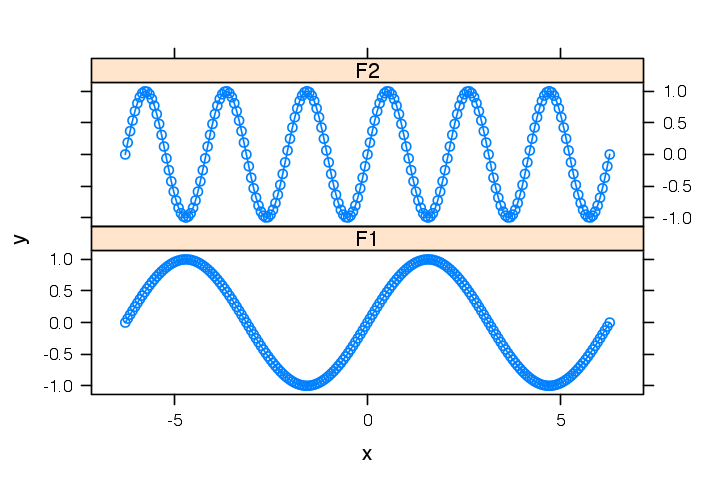

In [27]:
x <- seq(from = -2*pi,        # para `x` desde ...
         to = 2*pi,           # para `x` hasta ...
         length.out = 201 )   # cantidad de puntos

# se generan los puntos de las dos curvas
df <- data.frame(x = c(x, x), 
                 y = c(sin(x), sin(3*x)),
                 z = factor(c(rep('F1', 201), 
                              rep('F2', 201))))

options(repr.plot.width=6, repr.plot.height=4)

xyplot(x = y ~ x | z,        # formula
       data = df,            # dataframe
       type = 'o',           # 'o' - overplotted
       layout = c(1,2))      # gráfica en 1 columna x 2 filas


## Personalización de gráficos

> 
[`panel.abline`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/panel.functions.html)  
`panel.curve`  
`panel.rug`  
`panel.average`  
`panel.linejoin`  
`panel.fill`  
`panel.grid`   
[`panel.xyplot`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/panel.xyplot.html)  

Las funciones en Lattice tienen el parámetro `panel`, el cual admite una función para controlar el interior de cada panel. Existen muchas funciones que son llamadas por defecto, como es el caso de `panel.xyplot` en los ejemplos anteriores.

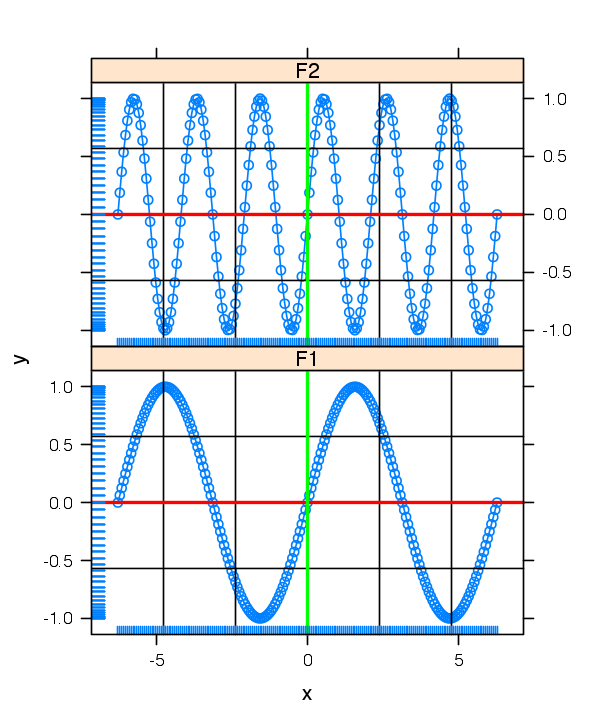

In [28]:
# retomando el ejemplo anterior.

mypanel <- function(x, y, ...) {
    
    # llamada a la función genérica
    panel.xyplot(x, y, ...)
    
    # analoga a la función grid{base}
    panel.grid(h = 3,          # 3 líneas horizontales
               v = 5,          # 5 líneas verticales
               x = x,          # x
               y = y,          # y
               lty = 'solid',  # tipo de línea
               col = 'black',  # color
               ...)
    
    # analoga a abline{base}
    panel.abline(h = 0, lwd = 2, col = 'red', ...)
    panel.abline(v = 0, lwd = 2, col = 'green', ...)
    
    # analoga a rug{base}
    panel.rug(x, y,  ...)
}

options(repr.plot.width=5, repr.plot.height=6)

xyplot(x = y ~ x | z,        # formula
       data = df,            # dataframe
       type = 'o',           # 'o' - overplotted
       panel = mypanel,      # llamada a la función anterior
       layout = c(1,2))      # gráfica en 1 columna x 2 filas



Lattice también implementa funciones para la personalización de gráficos que incluyen el dibujo de flechas, rectángulos, etc. Estas son:
* `panel.lines(...)`
* `panel.points(...)`
* `panel.segments(...)`
* `panel.text(...)`
* `panel.rect(...)`
* `panel.arrows(...)`
* `panel.polygon(...)`

## Visualización de distribuciones univariadas

> [`histogram {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/histogram.html)

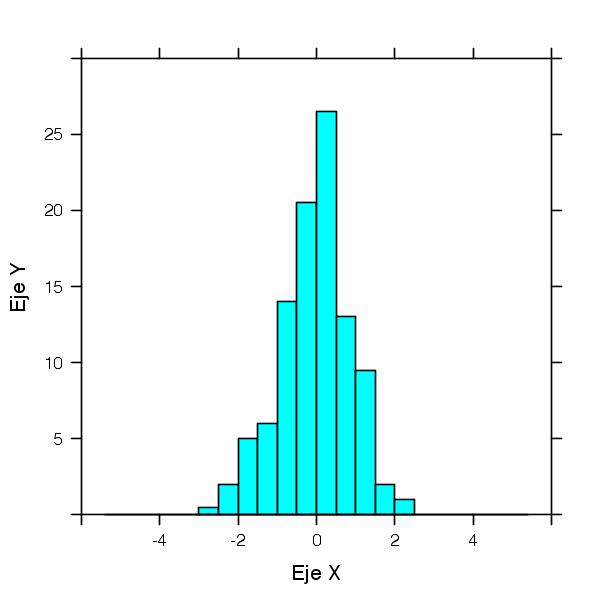

In [29]:
options(repr.plot.width=5, repr.plot.height=5)

histogram(x = rnorm(200),
          aspect = "fill",
          xlab = 'Eje X', 
          xlim = c(-6,6), 
          ylab = 'Eje Y', 
          ylim = c(0, 30),
          type = c("percent", "count", "density"),
          breaks = 15)

Note que `hist {base}` requiere que `x` sea un vector de valores. `histogram {lattice}` permite manejar grupos dentro de dataframes, facilitando todo el proceso de graficación.

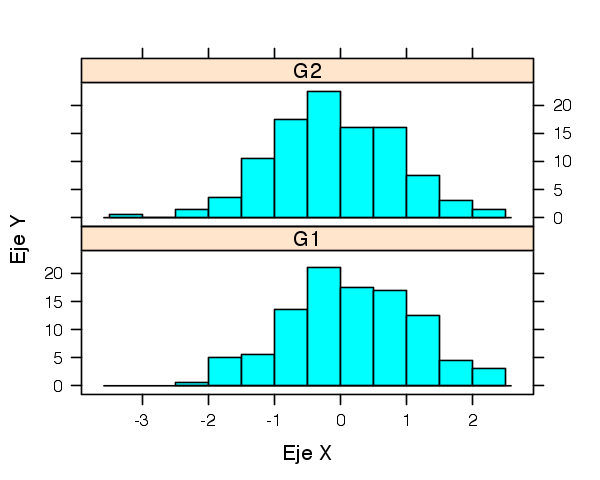

In [9]:
options(repr.plot.width=5, repr.plot.height=4) 
x <- rnorm(400)
y <- c(rep('G1', 200), rep('G2', 200))
df <- data.frame(x, factor(y))
histogram(~x | y,
          data = df,
          breaks = 15,
          layout = c(1, 2),
          ylab = 'Eje Y',
          xlab = 'Eje X')    

> [`densityplot {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/histogram.html)

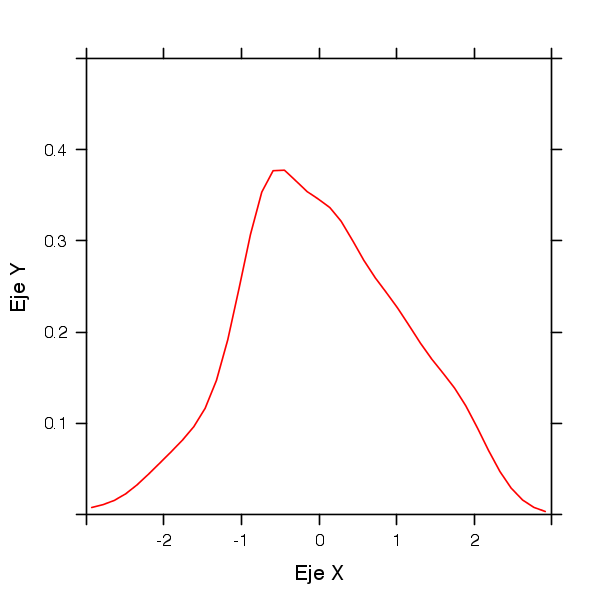

In [10]:
options(repr.plot.width=5, repr.plot.height=5)
densityplot(x = rnorm(200),
            aspect = "fill",
            xlab = 'Eje X', 
            xlim = c(-3,3), 
            ylab = 'Eje Y', 
            ylim = c(0, 0.5),
            col = 'red',
            type = 'count')       # c("percent", "count", "density"),


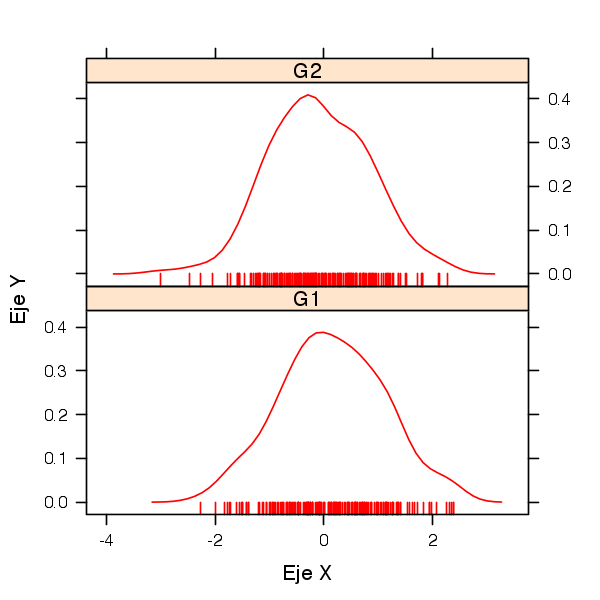

In [12]:
options(repr.plot.width=5, repr.plot.height=5)
densityplot(x = ~x | y,
            data = df,
            col = 'red', 
            plot.points = "rug",  # opciones: FALSE, 'rug', 
            layout = c(1, 2),
            ylab = 'Eje Y',
            xlab = 'Eje X') 

> [`barchart {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/xyplot.html)

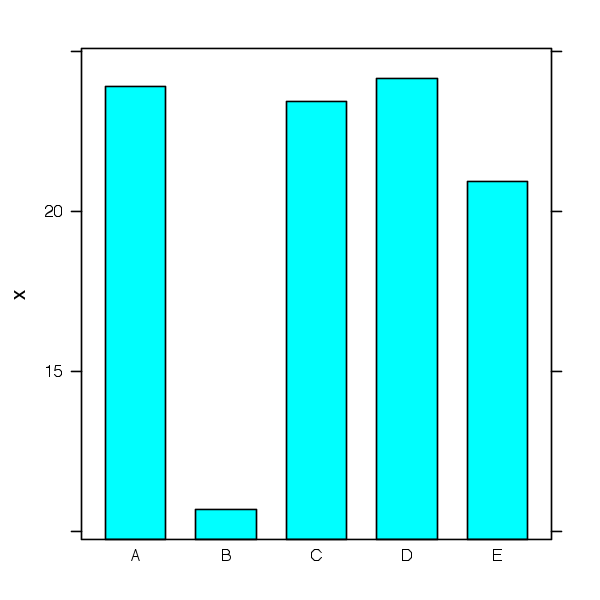

In [25]:
N <- 5                             # cantidad de barras
x <- runif(N, min = 10, max = 30)  # datos de cada barra
x.names <- LETTERS[1:N]            # nombres de cada barra
df <- data.frame(x = x, y = x.names)

barchart(x = x ~ y,
         data = df,
         stack = FALSE)

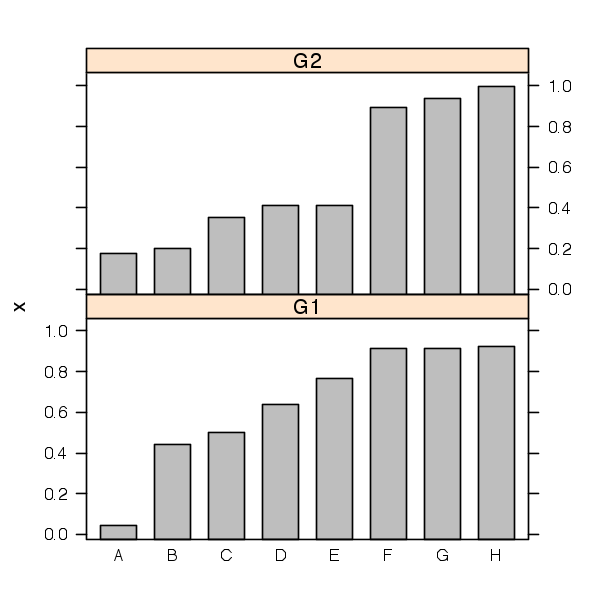

In [14]:
x <- c(sort(runif(8)),  sort(runif(8)))
y <- c(LETTERS[1:8], LETTERS[1:8])
f <- factor(c(rep('G1',8), rep('G2',8)))
df = data.frame(x, y, f)

barchart(x = x ~ y | f ,
        data = df,
        layout = c(1, 2),
        col = 'gray')

> [`dotplot {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/xyplot.html)

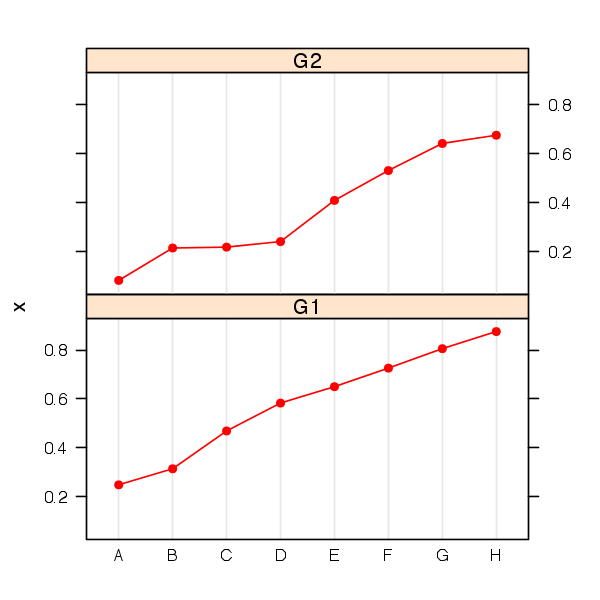

In [16]:
x <- c(sort(runif(8)),  sort(runif(8)))
y <- c(LETTERS[1:8], LETTERS[1:8])
f <- factor(c(rep('G1',8), rep('G2',8)))
df = data.frame(x, y, f)

dotplot(x = x ~ y | f ,
        type = 'o',
        data = df,
        layout = c(1, 2),
        col = 'red')

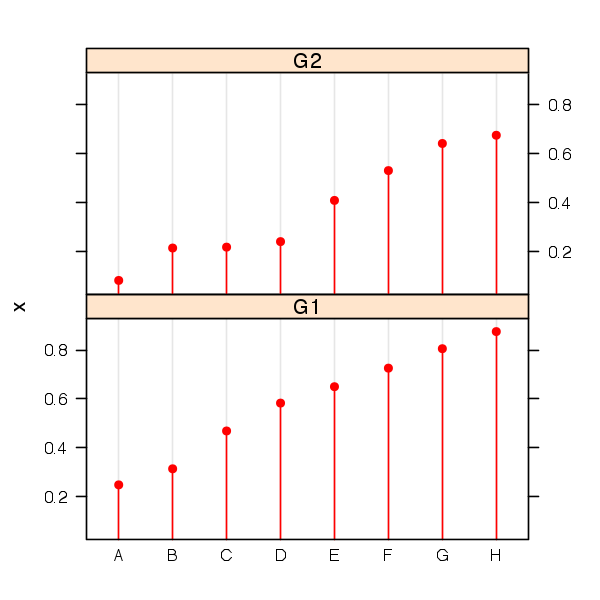

In [17]:
dotplot(x = x ~ y | f ,
        type = c('p', 'h'),
        data = df,
        layout = c(1, 2),
        col = 'red')

> [`bwplot {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/xyplot.html)

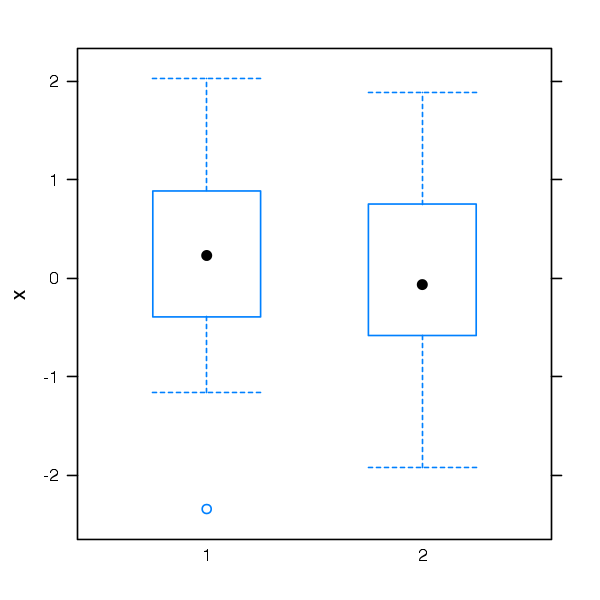

In [18]:
df <- data.frame(x = rnorm(90),
                 y = factor(c(rep(1,45), rep(2,45))))

bwplot(x = x ~ y, data = df)

> [`stripplot {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/xyplot.html)

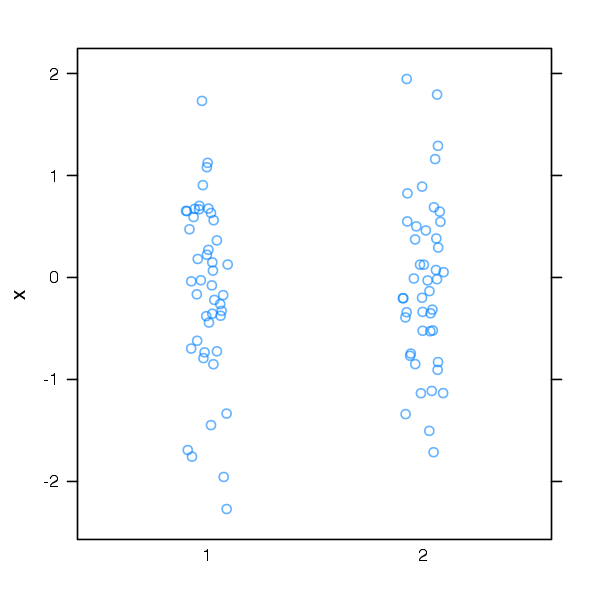

In [19]:
df <- data.frame(x = rnorm(90),
                 y = factor(c(rep(1,45), rep(2,45))))

stripplot(x = x ~ y, data = df,  alpha = 0.6, jitter.data = TRUE)

> [`splom {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/splom.html)

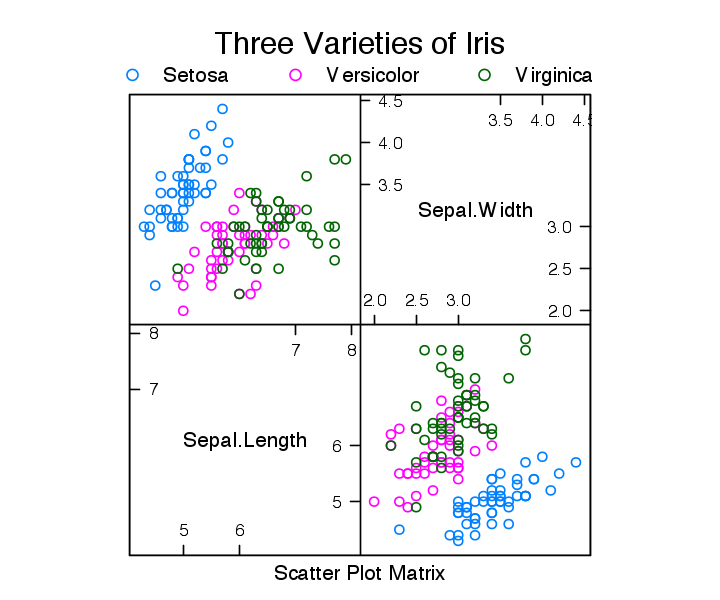

In [165]:
super.sym <- trellis.par.get("superpose.symbol")
splom(~iris[1:2], groups = Species, data = iris,
      panel = panel.superpose,
      key = list(title = "Three Varieties of Iris",
                 columns = 3, 
                 points = list(pch = super.sym$pch[1:3],
                 col = super.sym$col[1:3]),
                 text = list(c("Setosa", "Versicolor", "Virginica"))))

## Superficies y otros gráficos tridimensionales

> [`levelplot {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/levelplot.html)

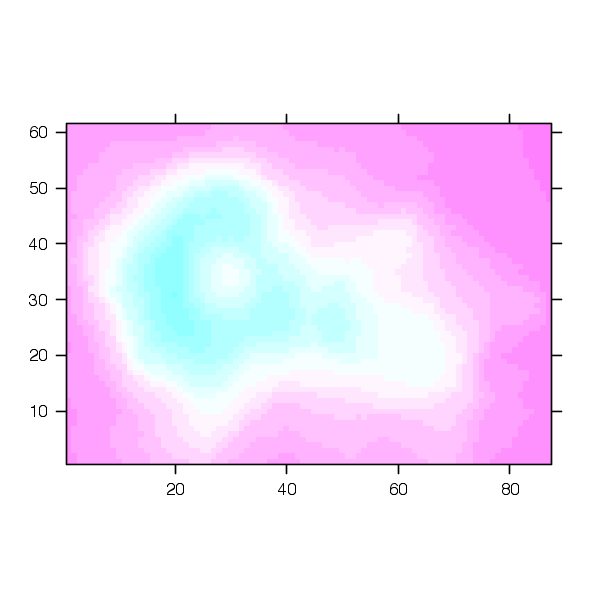

In [21]:
options(repr.plot.width=5, repr.plot.height=5) 
levelplot(volcano, 
          xlab="",
          ylab="", 
          main="", 
          sub="",
          colorkey = FALSE, 
          region = TRUE)


> [`contourplot`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/levelplot.html)

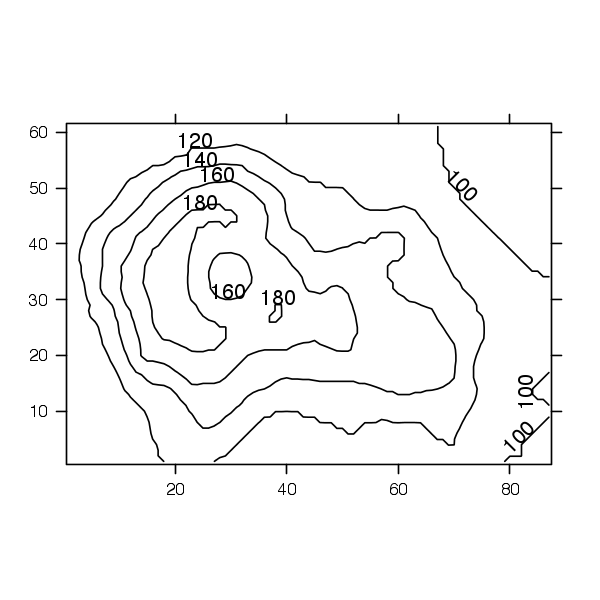

In [22]:
options(repr.plot.width=5, repr.plot.height=5) 
contourplot(volcano, 
          xlab="",
          ylab="", 
          main="", 
          sub="",
          colorkey = FALSE, 
          region = FALSE)

> [`wireframe {lattice}`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/cloud.html)

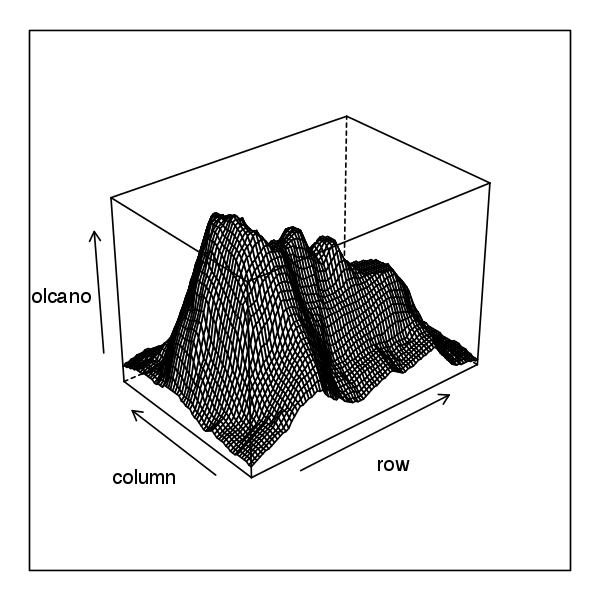

In [23]:
options(repr.plot.width=5, repr.plot.height=5) 
wireframe(volcano, 
          drape = FALSE,
          shade = FALSE)

> [`cloud`](https://stat.ethz.ch/R-manual/R-devel/library/lattice/html/cloud.html)

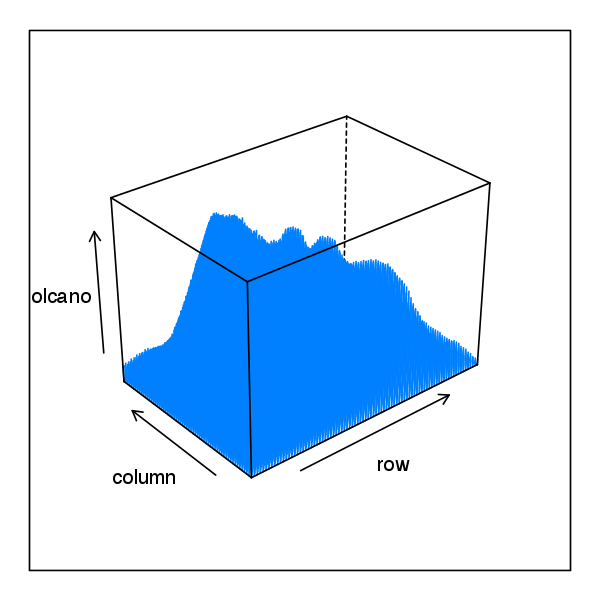

In [24]:
options(repr.plot.width=5, repr.plot.height=5) 
cloud(volcano)